In [19]:
import pandas as pd 
from not_bunny import *
import numpy as np

In [20]:
data = pd.read_csv('stock_data.csv')
del data['Volume']
data = data.set_index(['Date', 'Ticker'])
data

Adj Close       Close        High         Low        Open
Date       Ticker                                                            
2014-02-03 AAPL     15.703114   17.911785   18.133215   17.832144   17.950357
           AMD       3.330000    3.330000    3.440000    3.330000    3.430000
           AMZN     17.307501   17.307501   18.042500   17.004999   17.948999
           CRM      58.470001   58.470001   61.200001   58.070000   61.099998
           GOOGL    28.364115   28.364115   29.572573   28.328579   29.509510
...                       ...         ...         ...         ...         ...
2024-02-01 INTC     43.360001   43.360001   43.570000   42.490002   43.150002
           META    394.779999  394.779999  400.500000  393.049988  393.940002
           MSFT    403.779999  403.779999  408.000000  401.799988  401.829987
           NVDA    630.270020  630.270020  631.909973  616.500000  621.000000
           TSLA    188.860001  188.860001  189.880005  184.279999  188.500000

[25170 rows x 5 columns]

In [21]:
aapl = data.xs('AAPL', level='Ticker')
aapl

,Adj Close,Close,High,Low,Open
Date,,,,,
2014-02-03,15.703114,17.911785,18.133215,17.832144,17.950357
2014-02-04,15.930429,18.171070,18.195000,17.955713,18.066071
2014-02-05,16.049398,18.306786,18.402857,18.080357,18.091429
2014-02-06,16.142948,18.303928,18.339287,18.136070,18.216429
2014-02-07,16.368795,18.559999,18.676071,18.477858,18.620714
...,...,...,...,...,...
2024-01-26,192.419998,192.419998,194.759995,191.940002,194.270004
2024-01-29,191.729996,191.729996,192.199997,189.580002,192.009995
2024-01-30,188.039993,188.039993,191.800003,187.470001,190.940002


In [22]:
adj_close = aapl['Adj Close'].values.reshape(-1, 1)
adj_close.shape

(2517, 1)

In [23]:
mae, mse, r2, pred, actual = ann(adj_close)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331 (1.29 KB)
Trainable params: 331 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/100
52/52 [==============================] - 1s 3ms/step - loss: 0.0351 - val_loss: 0.2288
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.1554
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.1051
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0744
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0597
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0491
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0398
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0332
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0298
Epoch 10/100
52/52 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0230
Epoc

In [24]:
r2

-4.765058238954985

In [25]:
mse

2383.5601606069513

In [26]:
mae

44.7184620110885

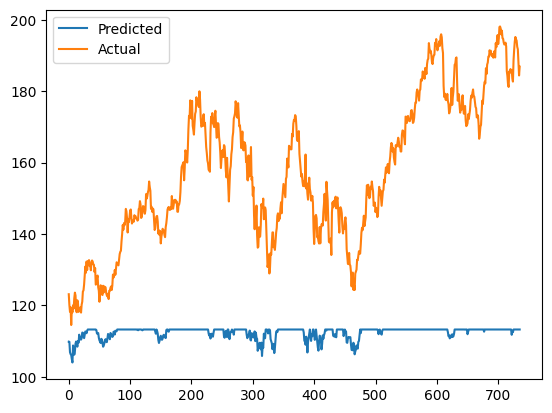

In [27]:
# Plotting the results
import matplotlib.pyplot as plt
plt.plot(pred, label='Predicted')
plt.plot(actual, label='Actual')
plt.legend()
plt.show()